In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def loadData():
    with np.load('notMNIST.npz') as dataset:
        Data, Target = dataset['images'], dataset['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget


In [19]:
def loss(w, b, x, y, reg):
    y_hat = 1.0 / (1.0 + np.exp(-np.matmul(x, w) - b))
    error = -1 * y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)
    CEloss = np.sum(error) / np.shape(x)[0] + reg * np.sum(w*w) / 2
    return CEloss    

In [20]:
def grad_loss(w, b, x, y, reg):
    x = x.reshape(x.shape[0], -1)
    s = 1 / (1 + np.exp(-np.matmul(x, w) - b))
    grad_w = (np.matmul(np.transpose(x), s - y)) / np.shape(x)[0] + reg * w
    grad_b = np.sum(s - y) / np.shape(x)[0]
    return grad_w, grad_b

In [21]:
def get_accuracy(w, b, x, y):
    correct = 0
    y_hat = 1.0 / (1.0 + np.exp(-np.matmul(x, w) - b))
    for idx in range(len(y_hat)):
        if y_hat[idx] >= 0.5 and y[idx] == 1:
            correct += 1
        if y_hat[idx] < 0.5 and y[idx] == 0:
            correct += 1
    return correct / len(y_hat)

In [22]:
def grad_descent(w, b, x, y, x1, y1, alpha, epochs, reg, error_tol):
    train_loss, train_acc, validation_loss, validation_acc = [], [], [], []
    for epochs_num in range(epochs):
        train = loss(w, b, x, y, reg)
        train_a = get_accuracy(w, b, x, y)
        val = loss(w, b, x1, y1, reg)
        val_a = get_accuracy(w, b, x1, y1)
        train_loss.append(train)
        validation_loss.append(val)
        train_acc.append(train_a)
        validation_acc.append(val_a)
        grad_w, grad_b = grad_loss(w, b, x, y, reg)
        new_w = w - alpha * grad_w
        new_b = b - alpha * grad_b
        diff = np.linalg.norm(w - new_w)
        if diff < error_tol:
            return w, b, train_loss, validation_loss, train_acc, validation_acc
        w = new_w
        b = new_b
    return w, b, train_loss, validation_loss, train_acc, validation_acc

In [23]:
def grad_descent_plot(w, b, x, y, x1, y1, alpha, epochs, reg, error_tol):
    train_loss, train_acc, validation_loss, validation_acc = [], [], [], []
    for epochs_num in range(epochs):
        train = loss(w, b, x, y, reg)
        train_a = get_accuracy(w, b, x, y)
        val = loss(w, b, x1, y1, reg)
        val_a = get_accuracy(w, b, x1, y1)
        train_loss.append(train)
        validation_loss.append(val)
        train_acc.append(train_a)
        validation_acc.append(val_a)
        grad_w, grad_b = grad_loss(w, b, x, y, reg)
        new_w = w - alpha * grad_w
        new_b = b - alpha * grad_b
        diff = np.linalg.norm(w - new_w)
        if diff < error_tol:
            break
        w = new_w
        b = new_b
    epoch_num = range(len(train_loss))
    #plot loss
    plt.plot(epoch_num, train_loss)
    plt.plot(epoch_num, validation_loss)
    plt.legend(['train_loss', 'val_loss'])
    plt.xlabel('number of epochs')
    plt.ylabel('loss')
    plt.title('Training and validation loss')
    plt.show()
    #plot accuracy
    plt.plot(epoch_num, train_acc)
    plt.plot(epoch_num, validation_acc)
    plt.legend(['train_acc', 'val_acc'])
    plt.xlabel('number of epochs')
    plt.ylabel('accuracy')
    plt.title('Training and validation accuracy')
    plt.show()
    print("Final training loss:", train_loss[-1], "validation loss:", validation_loss[-1])
    print("Final training accuracy:", train_acc[-1], "validation accuracy:", validation_acc[-1])
    return w, b

In [24]:
#load data
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

In [9]:
#Start with alpha = 0.005 and reg = 0

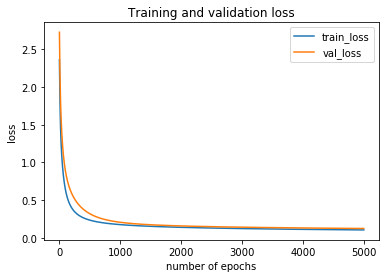

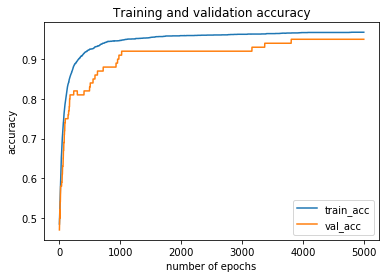

Final training loss: 0.106079038668 validation loss: 0.124897077928
Final training accuracy: 0.9677142857142857 validation accuracy: 0.95


In [13]:
trainData = trainData.reshape((trainData.shape[0], -1))
validData = validData.reshape((validData.shape[0], -1))
w = np.random.normal(loc=0, scale=0.5, size=(trainData.shape[1],1))
b = 0
alpha = 0.005
epochs = 5000
reg = 0
error_tol = 1e-7
w1, b1 = grad_descent_plot(w, b, trainData, trainTarget, validData, validTarget, alpha, epochs, reg, error_tol)

In [ ]:
#Then is alpha = 0.001 and reg = 0

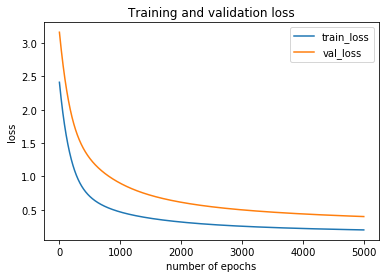

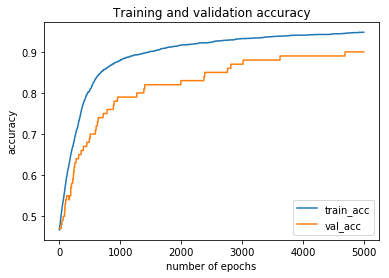

Final training loss: 0.198718616736 validation loss: 0.3988271494
Final training accuracy: 0.9477142857142857 validation accuracy: 0.9


In [14]:
trainData = trainData.reshape((trainData.shape[0], -1))
validData = validData.reshape((validData.shape[0], -1))
w = np.random.normal(loc=0, scale=0.5, size=(trainData.shape[1],1))
b = 0
alpha = 0.001
epochs = 5000
reg = 0
error_tol = 1e-7
w2, b2 = grad_descent_plot(w, b, trainData, trainTarget, validData, validTarget, alpha, epochs, reg, error_tol)

In [ ]:
#Then is alpha = 0.0001 and reg = 0

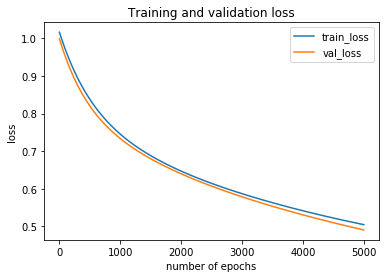

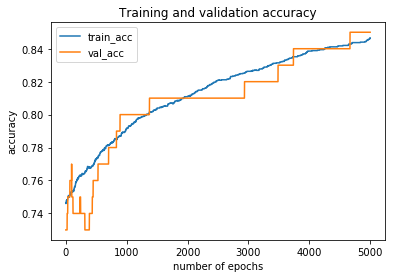

Final training loss: 0.504891998945 validation loss: 0.490903272501
Final training accuracy: 0.8465714285714285 validation accuracy: 0.85


In [10]:
trainData = trainData.reshape((trainData.shape[0], -1))
validData = validData.reshape((validData.shape[0], -1))
w = np.random.normal(loc=0, scale=0.5, size=(trainData.shape[1],1))
b = 0
alpha = 0.0001
epochs = 5000
reg = 0
error_tol = 1e-7
w3, b3 = grad_descent_plot(w, b, trainData, trainTarget, validData, validTarget, alpha, epochs, reg, error_tol)

I'll choose a learning rate of 0.005, this is because 0.005 learning rate has the lowest validation loss
We can also discovered from the plot that 0.001 and 0.0001 learning rate are still in underfit stage, they need more training
The test accuracy for the learning rate I choose of 97.24%

In [16]:
testData = testData.reshape((testData.shape[0], -1))
test_accuracy = get_accuracy(w1, b1, testData, testTarget)
print("Test accuracy with 0.005 learning rate is:", test_accuracy)
test_accuracy = get_accuracy(w2, b2, testData, testTarget)
print("Test accuracy with 0.001 learning rate is:", test_accuracy)
test_accuracy = get_accuracy(w3, b3, testData, testTarget)
print("Test accuracy with 0.0001 learning rate is:", test_accuracy)

Test accuracy with 0.005 learning rate is: 0.9586206896551724
Test accuracy with 0.001 learning rate is: 0.9379310344827586
Test accuracy with 0.0001 learning rate is: 0.8689655172413793


In [17]:
#Part 4

In [ ]:
#first we set reg = 0.001 and alpha = 0.005

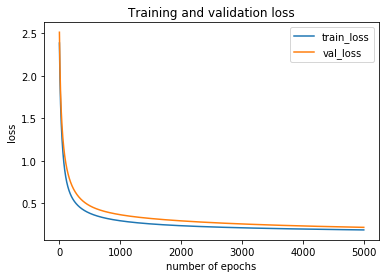

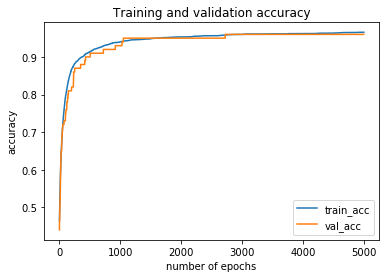

Final training loss: 0.189004978155 validation loss: 0.219244225705
Final training accuracy: 0.9657142857142857 validation accuracy: 0.96


In [10]:
trainData = trainData.reshape((trainData.shape[0], -1))
validData = validData.reshape((validData.shape[0], -1))
w = np.random.normal(loc=0, scale=0.5, size=(trainData.shape[1],1))
b = 0
alpha = 0.005
epochs = 5000
reg = 0.001
error_tol = 1e-7
w4, b4 = grad_descent_plot(w, b, trainData, trainTarget, validData, validTarget, alpha, epochs, reg, error_tol)

In [11]:
#Then is reg = 0.1 and alpha = 0.005

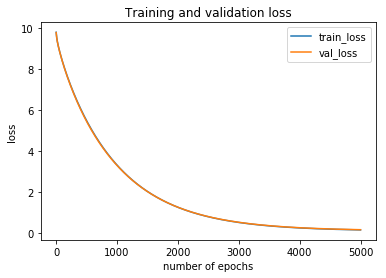

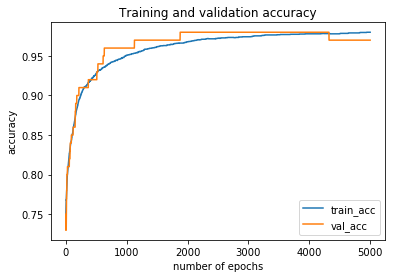

Final training loss: 0.169836261036 validation loss: 0.180145663426
Final training accuracy: 0.98 validation accuracy: 0.97


In [26]:
trainData = trainData.reshape((trainData.shape[0], -1))
validData = validData.reshape((validData.shape[0], -1))
w = np.random.normal(loc=0, scale=0.5, size=(trainData.shape[1],1))
b = 0
alpha = 0.005
epochs = 5000
reg = 0.1
error_tol = 1e-7
w6, b6 = grad_descent_plot(w, b, trainData, trainTarget, validData, validTarget, alpha, epochs, reg, error_tol)

In [13]:
#Then we see reg = 0.5 and alpha = 0.005

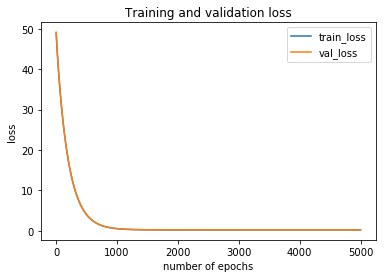

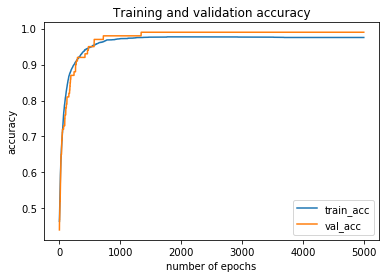

Final training loss: 0.197760742913 validation loss: 0.215351798459
Final training accuracy: 0.9754285714285714 validation accuracy: 0.99


In [25]:
trainData = trainData.reshape((trainData.shape[0], -1))
validData = validData.reshape((validData.shape[0], -1))
w = np.random.normal(loc=0, scale=0.5, size=(trainData.shape[1],1))
b = 0
alpha = 0.005
epochs = 5000
reg = 0.5
error_tol = 1e-7
w6, b6 = grad_descent_plot(w, b, trainData, trainTarget, validData, validTarget, alpha, epochs, reg, error_tol)

I choose reg = 0.001 and alpha = 0.005 group
This is because this group has the lowest validation loss and the highest validation accuracy

In [29]:
testData = testData.reshape((testData.shape[0], -1))
test_accuracy = get_accuracy(w6, b6, testData, testTarget)
print("Test accuracy with 0.5 regularization parameter is:", test_accuracy)

Test accuracy with 0.5 regularization parameter is: 0.9793103448275862


In [30]:
testData = testData.reshape((testData.shape[0], -1))
test_accuracy = get_accuracy(w4, b4, testData, testTarget)
print("Test accuracy with 0.001 regularization parameter is:", test_accuracy)
test_accuracy = get_accuracy(w5, b5, testData, testTarget)
print("Test accuracy with 0.1 regularization parameter is:", test_accuracy)
test_accuracy = get_accuracy(w6, b6, testData, testTarget)
print("Test accuracy with 0.5 regularization parameter is:", test_accuracy)

Test accuracy with 0.001 regularization parameter is: 0.9724137931034482
Test accuracy with 0.1 regularization parameter is: 0.9793103448275862
Test accuracy with 0.5 regularization parameter is: 0.9793103448275862
